# Advanced Data Science Nanodegree   
# Connect Sessions - Case Study \#1 - Big Mart Problem

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#ref">References and Addtional information</a></li>  
   
</ul>

<a id='intro'></a>
## Introduction
>Nothing ever becomes real till it is experienced.  
-John Keats  
>
>While we don't know the context in which John Keats mentioned this, we are sure about its implication in data science.  
>The objective of the case-study is practicing descritpive statistics techniques by achieving the below goals:  
>1. Data Wrangling/Cleaning
>2. Exploratory Data Analysis
>3. Conclusions  

>### Dataset Description
|Variable               |Description                                                                                |
|:-----------------------|:-------------------------------------------------------------------------------------------|
|Itemldentifier         |Unique product ID                                                                          |
|ItemWeight             |Weight of product                                                                          |
|ItemFatContent         |Whether the product is low fat or not                                                      |
|ItemVisibility         |The % of total display area of all products in a store allocated to the particular product |
|ItemType               |The category to which the product belongs                                                  |
|ItemMRP                |Maximum Retail Price (list price) of the product                                           |
|Outletldentifier       |Unique store ID                                                                            |
|OutletEstablishmentYear|The year in which store was established                                                    |
|OutletSize             |The size of the store in terms of ground area covered                                      |
|OutletLocationType     |The type of city in which the store is located                                             |
|OutletType             |Whether the outlet is just a grocery store or some sort of supermarket                     |
|ItemOutletSales        |Sales of the product in the particular store. This is the outcome variable to be predicted.|

>[Link](https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/)

>### Group members:  
| Name              | Email                                                                       |
| :----------------- | :--------------------------------------------------------------------------- |
| Amgad Mohamed     | [amgad.attia@gmail.com](mailto:amgad.attia@gmail.com)                       |
| Mohab Salem       | [mohabmaher2018@gmail.com](mailto:mohabmaher2018@gmail.com)                 |
| Mohamed Arafa     | [m.a.arafa@gmail.com](mailto:m.a.arafa@gmail.com)                           |
| Mohamed M.Soliman | [mohamedmohamedsoliman1@gmail.com](mailto:mohamedmohamedsoliman1@gmail.com) |
| Mohamed Ramadan   | [muhamad.ramadan@gmail.com](mailto:muhamad.ramadan@gmail.com)               |
| Yousef Khaled     | [yk5828033@gmail.com](mailto:yk5828033@gmail.com)                           |

In [140]:
# import libraries
import pandas as pd
import numpy as np

# import visualization lib
import matplotlib.pyplot as plt
import missingno  as msno
import seaborn as sns
sns.reset_defaults()

#supress unwanted warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, we will load the data, check for cleanliness, and then trim and clean your dataset for analysis.

### General Properties

In [141]:
#load data
df=pd.read_csv('CaseStudy1.csv')

In [142]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [143]:
# Check columns datatypes, dataset shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [144]:
# Check catigorical columns descriptive analysis
df.describe(include=['object'])

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


In [145]:
# Check numerical columns descriptive analysis
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [146]:
# Check columns with NaN values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [147]:
# Check duplicated rows
df.duplicated().sum()

0

In [148]:
# check anomalies in categorical columns values
df['Item_Fat_Content'].value_counts().sort_index()

LF          316
Low Fat    5089
Regular    2889
low fat     112
reg         117
Name: Item_Fat_Content, dtype: int64

In [149]:
df['Item_Type'].value_counts().sort_index()

Baking Goods              648
Breads                    251
Breakfast                 110
Canned                    649
Dairy                     682
Frozen Foods              856
Fruits and Vegetables    1232
Hard Drinks               214
Health and Hygiene        520
Household                 910
Meat                      425
Others                    169
Seafood                    64
Snack Foods              1200
Soft Drinks               445
Starchy Foods             148
Name: Item_Type, dtype: int64

In [150]:
df.Outlet_Location_Type.value_counts().sort_index()

Tier 1    2388
Tier 2    2785
Tier 3    3350
Name: Outlet_Location_Type, dtype: int64

In [151]:
df.Outlet_Size.value_counts().sort_index()

High       932
Medium    2793
Small     2388
Name: Outlet_Size, dtype: int64

In [152]:
df.Outlet_Type.value_counts().sort_index()

Grocery Store        1083
Supermarket Type1    5577
Supermarket Type2     928
Supermarket Type3     935
Name: Outlet_Type, dtype: int64

**From the above steps, we understood the following about the dataset:**
1. Number of columns: 12, Number of rows: 8523
2. Number of categorical features(columns): 7, Number of Numerical features: 5
3. Number of ordinal features: 3 (`Item_Fat_Content`, `Outlet_Size`, and `Outlet_Location_Type`)
4. Number of discrete numirical features: 1 (Outlet_Establishment_Year)
5. No duplicate rows
6. Two rows with NaN values (`Item_Weight`, `Outlet_Size`)
7. Discrepancy in column `Item_Fat_Content` values and need alignment.

### Data Cleaning

#### Solve data anomalies 

> Solve value discrepancy in column `Item_Fat_Content`

In [153]:
# use a dict to replace and align values
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF': 'Low Fat' , 'low fat': 'Low Fat' , 'reg': 'Regular'})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

#### Visualizing columns with Nan values

<AxesSubplot:>

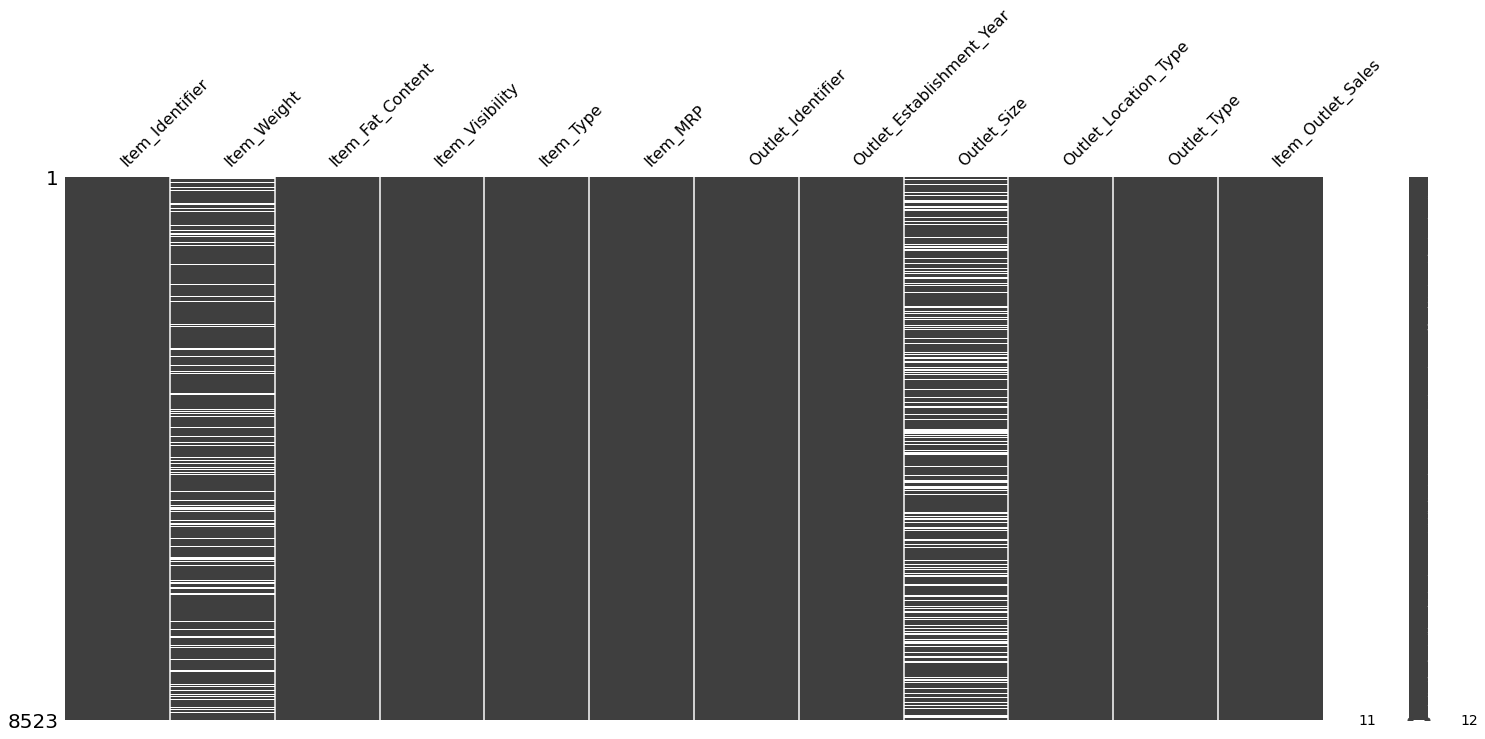

In [154]:
# Show NaN distribution over the two columns
msno.matrix(df)

#### Filling the missing values  

**1.** Dealing with **`Item_Weight`** column

<AxesSubplot:>

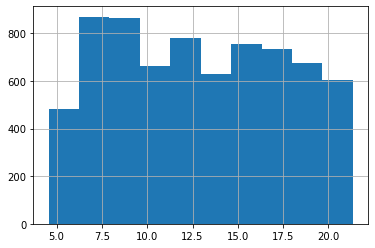

In [155]:
# Plot histogram
df['Item_Weight'].hist()

In [156]:
# show quantites per item
df.Item_Identifier.value_counts()

FDW13    10
FDG33    10
DRN47     9
FDT07     9
FDQ40     9
         ..
FDN52     1
FDO33     1
FDC23     1
FDY43     1
FDT35     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [157]:
# Check specific item
df.query('Item_Identifier=="NCZ41"')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
922,NCZ41,19.85,Low Fat,0.064368,Health and Hygiene,126.1704,OUT013,1987,High,Tier 3,Supermarket Type1,876.1928
5119,NCZ41,19.85,Low Fat,0.064409,Health and Hygiene,126.7704,OUT035,2004,Small,Tier 2,Supermarket Type1,1752.3856
5271,NCZ41,19.85,Low Fat,0.064552,Health and Hygiene,125.2704,OUT045,2002,NaN,Tier 2,Supermarket Type1,2127.8968
6744,NCZ41,19.85,Low Fat,0.064786,Health and Hygiene,123.7704,OUT017,2007,NaN,Tier 2,Supermarket Type1,2503.4080
6965,NCZ41,19.85,Low Fat,0.000000,Health and Hygiene,126.1704,OUT018,2009,Medium,Tier 3,Supermarket Type2,1877.5560


In [158]:
# Grouping the dataframe with Item ID
df.groupby(['Item_Identifier'])['Item_Weight'].mean().head()

Item_Identifier
DRA12    11.600
DRA24    19.350
DRA59     8.270
DRB01     7.390
DRB13     6.115
Name: Item_Weight, dtype: float64

In [159]:
#Check the number of NaN in the grouped Dataframe
df.groupby(['Item_Identifier'])['Item_Weight'].mean().isnull().sum()

4

From above it is obvious that each item id is representing a unique item with a specific weight hence, we can use item id weight to fill the missing value in column `Item_Weight`.  
Also, we noticed that we have four items with a quantity one with NaN value in column `Item_Weight`. This can be managed in another step

In [160]:
# Fill the missing values in item weight column for the items with quantity greater than one
df['Item_Weight']= df.groupby(['Item_Identifier']).transform(lambda x: x.fillna(x.mean()))

In [161]:
df['Item_Weight'].isnull().sum()

4

As expected we still have 4 NaN values in `Item_Weight` column

In [162]:
# Show rows with Nan values in item weight column
df[df['Item_Weight'].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


We can fill in the remaining missings with the `Item_Weight` average grouped by `Item_Fat_Content`

In [163]:
df['Item_Weight']= df.groupby(['Item_Fat_Content']).transform(lambda x: x.fillna(x.mean()))

In [164]:
df['Item_Weight'].isnull().sum()

0

<AxesSubplot:>

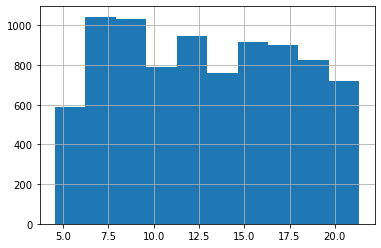

In [165]:
# Plot histogram
df['Item_Weight'].hist()

In [166]:
print('Standard Deviation  :',df.Item_Weight.std())
print('Mean                :',df.Item_Weight.mean())

Standard Deviation  : 4.645009076395116
Mean                : 12.875371623802147


Great!  
Comparing central measure of tendency before and after filling the missing values on `Item_Weight` columns, we found the feature statistical characteristics doesn't change.  
**Bingo!**

**2.** Dealing with **`Outlet_Size`** column

In [167]:
df.groupby(['Outlet_Identifier', 'Outlet_Location_Type', 'Outlet_Type'])['Outlet_Size'].value_counts(dropna=False)

Outlet_Identifier  Outlet_Location_Type  Outlet_Type        Outlet_Size
OUT010             Tier 3                Grocery Store      NaN            555
OUT013             Tier 3                Supermarket Type1  High           932
OUT017             Tier 2                Supermarket Type1  NaN            926
OUT018             Tier 3                Supermarket Type2  Medium         928
OUT019             Tier 1                Grocery Store      Small          528
OUT027             Tier 3                Supermarket Type3  Medium         935
OUT035             Tier 2                Supermarket Type1  Small          930
OUT045             Tier 2                Supermarket Type1  NaN            929
OUT046             Tier 1                Supermarket Type1  Small          930
OUT049             Tier 1                Supermarket Type1  Medium         930
Name: Outlet_Size, dtype: int64

From above step, we understand the following:  
1. The mart is holding total 10 outlets (It worth to know if the Mart has only 10 outlets or the dataset is not covering the whole outlets (Sample).  
2. Three Outlets (`OUT010`, `OUT017`, and `OUT045`) are missing size information.  

We can fill the missing Sizes with most frequent size grouped by `Outlet_Type` column

In [168]:
# Check most frequent size per type
df.groupby(['Outlet_Type'])['Outlet_Size'].agg(pd.Series.mode)

Outlet_Type
Grocery Store         Small
Supermarket Type1     Small
Supermarket Type2    Medium
Supermarket Type3    Medium
Name: Outlet_Size, dtype: object

In [169]:
# Fill the missing values in Outlet size with most frequent size grouped by Type
df.loc[df['Outlet_Size'].isna(), 'Outlet_Size'] = df.groupby(['Outlet_Type'])['Outlet_Size'].transform(
    lambda x: x.mode()[0] if any(x.mode()) else 'ALL_NAN')

In [170]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Now the dataset is clean and we can start the exploratory part.Let's save our clean data in csv file

In [171]:
df_clean = df.copy()
df_clean.to_csv('CaseStudy1_clean.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis

> Okay!! Now we have reached the core step of our case-study. In this step, we are going to explore our data with different prespectives and methods.

### Univariante Analysis

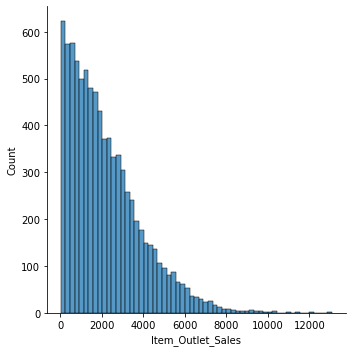

In [172]:
sns.displot(df_clean['Item_Outlet_Sales']);

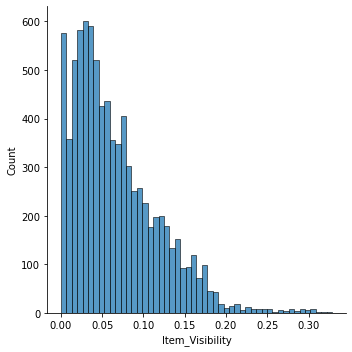

In [173]:
sns.displot(df_clean['Item_Visibility']);

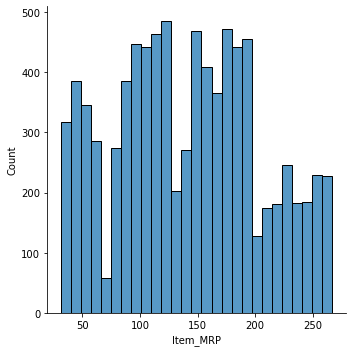

In [174]:
sns.displot(df_clean['Item_MRP']);

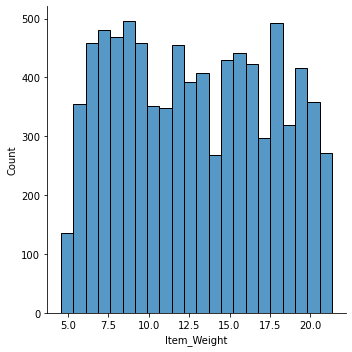

In [175]:
sns.displot(df_clean['Item_Weight']);

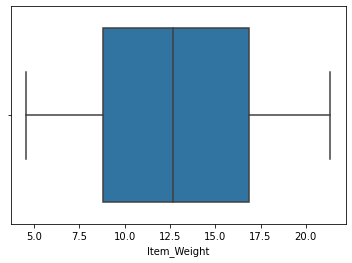

In [176]:
sns.boxplot(df_clean['Item_Weight']);

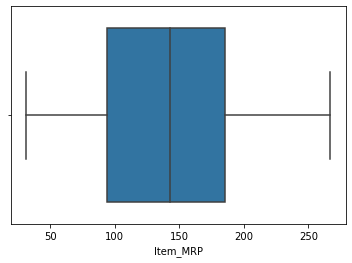

In [177]:
sns.boxplot(df_clean['Item_MRP']);

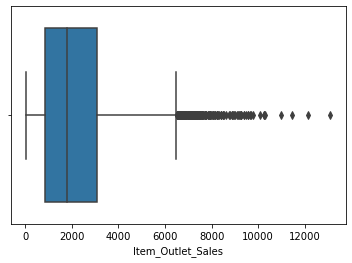

In [178]:
sns.boxplot(df_clean['Item_Outlet_Sales']);

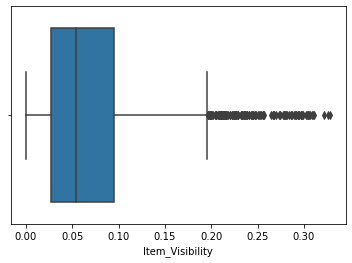

In [179]:
sns.boxplot(df_clean['Item_Visibility']);

In [180]:
df_clean.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.875372,0.066132,140.992782,1997.831867,2181.288914
std,4.645009,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.785000,0.026989,93.826500,1987.000000,834.247400
50%,12.650000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### Observation no. 1

From above histogram and box plots, we can understand the following about the columns:  
1. Two normally distributed columns:  
    a. Item Weight (**mean**=12.9, **std**=4.6)
    b. Item MRP (**mean**=141, **std**=62.3)
    
2. Two columns scewed to the right (Both have **OUTLIERS**):  
    a. Item Outlet Sales (**median**=1794, **range**=10905, **interquartile range**=2267)  
    b. Item Visibility (**median**=.054, **range**=0.33, **interquartile range**=0.068)

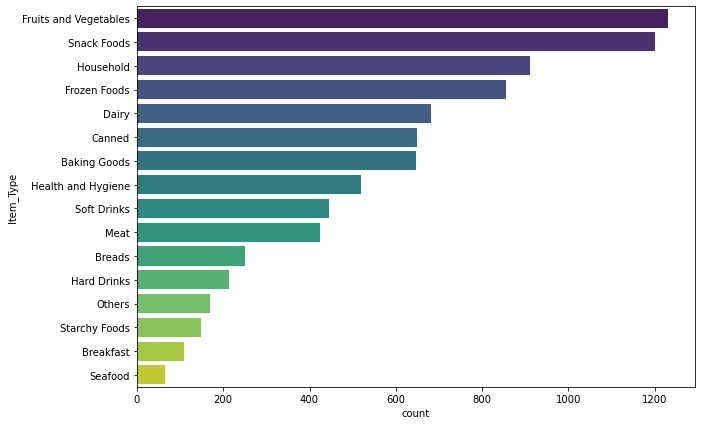

In [188]:
plt.figure(figsize= (10, 7))
sns.countplot(y='Item_Type', data=df_clean, palette='viridis', order= df.Item_Type.value_counts().index);

### Observation no. 2

The most frequently available items in the mart are: Fruits & Vegetables, Snack Foods, Household, Frozen Foods, and Dairy.  
However, the least frequently available items are: Starchy Foods, Breakfast, and Seafood.

### Mulitvariante Analysis

Lets first explore the correlation between variables

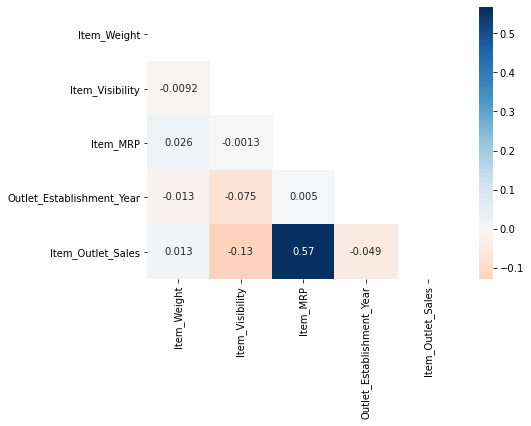

In [189]:
#corelation for numerical columns
plt.figure(figsize= (7, 5))
# Mask to hide upper-right part of plot as it is a duplicate
mask = np.transpose(np.tril(np.ones(df_clean.corr().shape)))
sns.heatmap(df_clean.corr(), annot = True, center = 0, cmap = 'RdBu', mask = mask);

From above,there is an obvious linear correlation between Item MRP (Maximum Retail Price) and Item Outlet Sales which is logic

#### Q1: How far is the correlation between Item MRP and Item Outlet Sales?

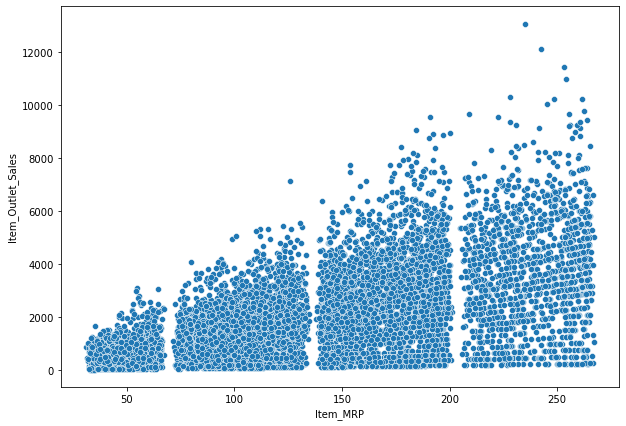

In [222]:
# plt a scatter plot for two variables

plt.figure(figsize= (10, 7))
sns.scatterplot(data=df_clean, x='Item_MRP', y='Item_Outlet_Sales');

From above, it seems there are more than two correlated variables. Let's consider the catigorical columns

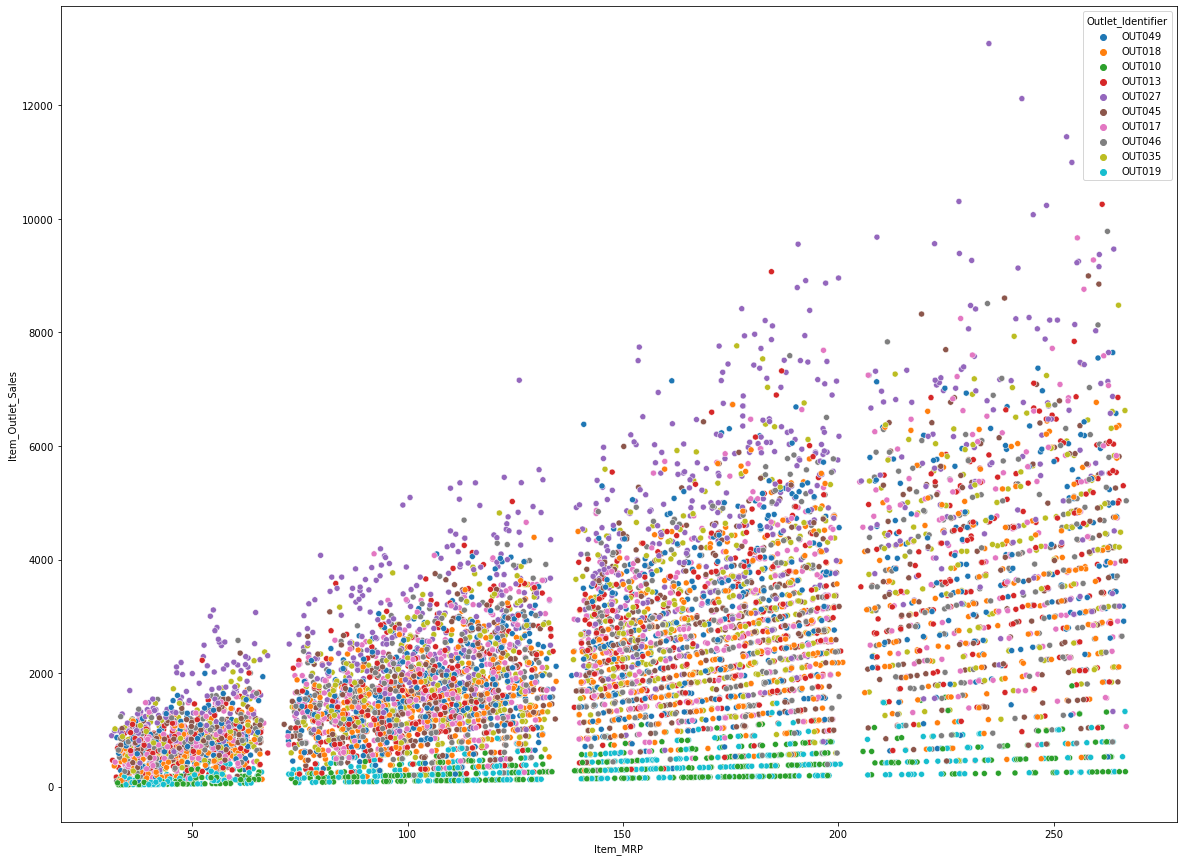

In [228]:
# plot a bubble plot for three variables - use Outlet_Idnetifier
plt.figure(figsize= (20, 15))
sns.scatterplot(data=df_clean, x='Item_MRP', y='Item_Outlet_Sales', hue='Outlet_Identifier');

We can see multiple linear corelations. Let's show a plot for a single outlet

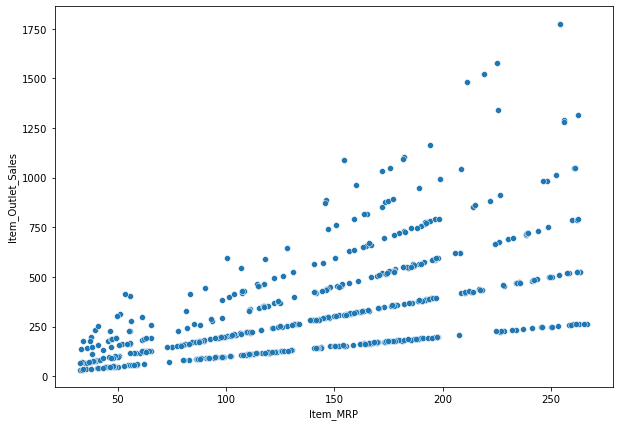

In [224]:
plt.figure(figsize= (10, 7))
sns.scatterplot(data=df_clean.query('Outlet_Identifier=="OUT010"'), x='Item_MRP', y='Item_Outlet_Sales');

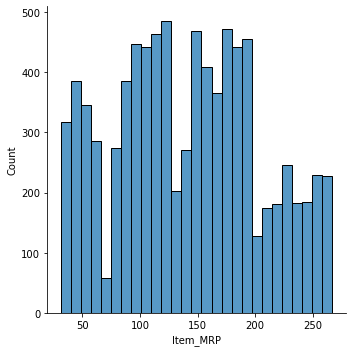

In [209]:
# repeat again
sns.displot(df_clean['Item_MRP']);

Another look to Item MRP and based on the above figures, we can say that Item MRP is not exactly normal distributed as we have the prices grouped into four groups. Does it make sense?  
Here, we can use pd.cut to divide the dataframe based on bins (price groups - using the five points summary)

#### Q2: What item receives higher Sales, Regular or Low Fat?

In [232]:
data_q2=df_clean.groupby(['Item_Fat_Content'])['Item_Outlet_Sales'].mean().reset_index()

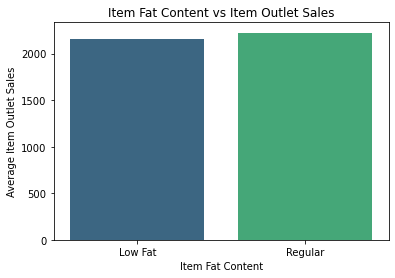

In [251]:
sns.barplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=data_q2, palette='viridis')
plt.title('Item Fat Content vs Item Outlet Sales')
plt.ylabel('Average Item Outlet Sales')
plt.xlabel('Item Fat Content');

Above figure illustrates, Regular Fat content item receives higher sales

#### Q3: What is the most visibile items?

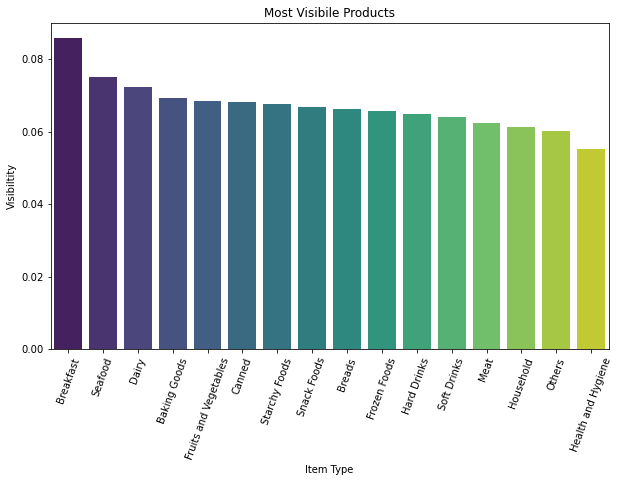

In [250]:
data_q3= df_clean.groupby('Item_Type')['Item_Visibility'].mean().reset_index().sort_values(by='Item_Visibility', ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x='Item_Type', y='Item_Visibility', data=data_q3, palette='viridis')
plt.title('Most Visibile Products')
plt.ylabel('Visibiltity')
plt.xlabel('Item Type')
plt.xticks(rotation=70);

The above plot shows the most visible three items are: Breakfast, Seafood, and then Dairy

#### Q4: What is the outlet with the most items sales?

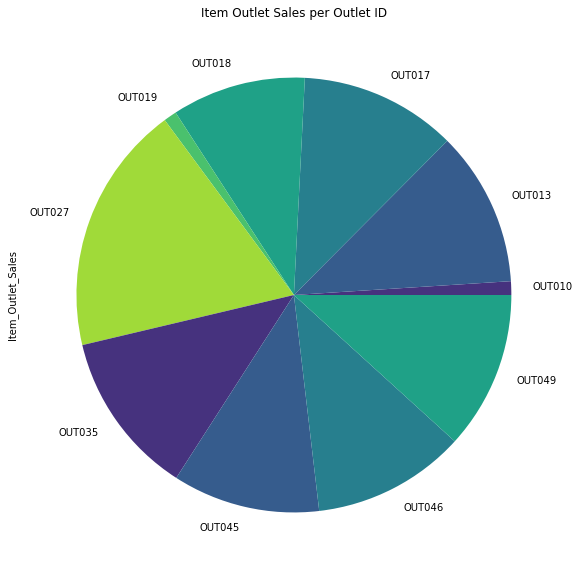

In [273]:
plt.figure(figsize=(20,10))
colors = sns.color_palette('viridis')
df.groupby(['Outlet_Identifier'])['Item_Outlet_Sales'].sum().plot(kind='pie', colors=colors)
plt.title('Item Outlet Sales per Outlet ID')
plt.xticks(rotation=70);

We can see that **OUT027** is the outlet with the most item sales

#### Q5: Does the Item outlet sales influenced by Outlet Size and Location?

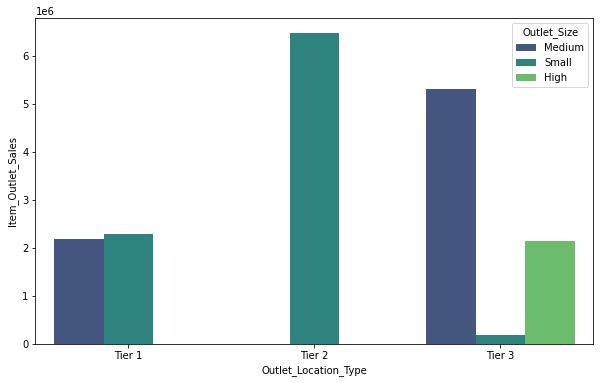

In [286]:
data_q5 = df.groupby(['Outlet_Location_Type', 'Outlet_Size'])['Item_Outlet_Sales'].sum().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=data_q5, x='Outlet_Location_Type', y='Item_Outlet_Sales',hue='Outlet_Size', palette='viridis');

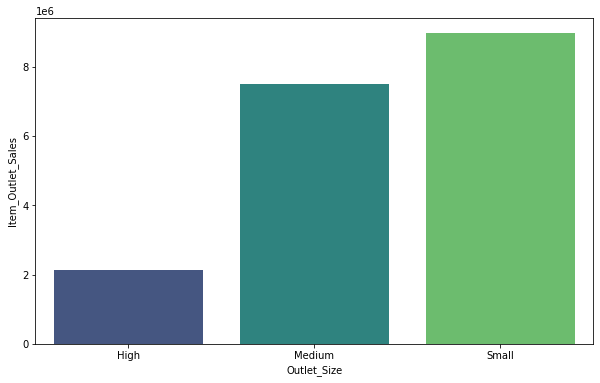

In [287]:
data_q5 = df.groupby(['Outlet_Size'])['Item_Outlet_Sales'].sum().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=data_q5, x='Outlet_Size', y='Item_Outlet_Sales', palette='viridis');

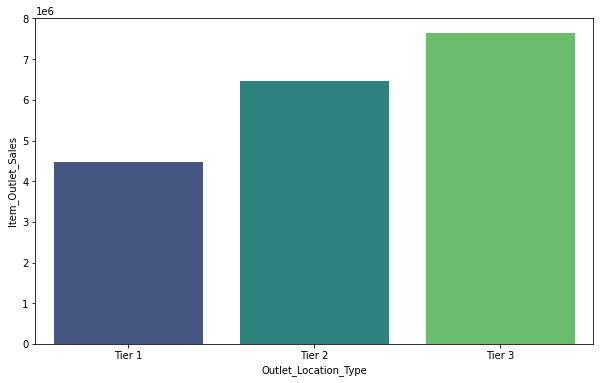

In [284]:
data_q5 = df.groupby(['Outlet_Location_Type'])['Item_Outlet_Sales'].sum().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=data_q5, x='Outlet_Location_Type', y='Item_Outlet_Sales', palette='viridis');

Based on the above figures, we can understand the following:
1. Based on Outlet Location: Tier3 has the highest Sales volume, then Tier2 and the lowest is Tier 1.  
2. Based on Outlet Size: Small Outlets have the highest Sales volume, then comes Medium then the lowest are outlets with high size. 

<a id='ref'></a>
## References and Additional information

#### Usefull Notebooks  
https://www.kaggle.com/aishu2218/evaluation-metrics-for-ml-regression-models  
https://www.kaggle.com/pranavuikey/bigmart-eda-with-complete-explanation  
https://www.kaggle.com/aishwarya2490/bigmart-sales-prediction-model#Missing-Data-Imputation  

